## Modelling Notebook

This notebook is to be used for testing out the various models that you want to use. No preprocessing will be done in this notebook. Steps:

1. Read in `input/train.csv`,`input/test.csv`,`input/validation.csv` that you created in the `Data Cleaning.ipynb`
2. Train your model(s) on `input/train.csv` and EVALUATE (no training) with appropriate metrics (accuracy/MSE etc) on `input/validation.csv` 
3. Pick a final model and EVALUATE(no training) on `input/test.csv` and print metrics
3. Pick a final model and save it as `models/model.pkl`

In [34]:
import sys
sys.path.append('..')
from utils.pipeline import prepare_features, train_model, predict_unlabeled
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
unlabeled_df = pd.read_csv('../input/unlabeled.csv')

## Step-by-step checklist:

1. Prepare Features
    - Separate feature (X) and target (y)

2. Logistic Regression Baseline
    - Train a simple model using logistic regression
    - Evaluate metrics such as accuracy, precision, recall, F1-score and AUC-ROC

3. XGBoost or Random Forest
    - Train a more complex model using XGBoost or Random Forest
    - Use GridSearchCV or RandomizedSearchCV for hyperparameter tuning
    - Evaluate the same metrics as in step 3

4. Cross-validation
    - Use StratifiedKFold to ensure stability in metrics

5. Explanation
    - Use SHAP and Permutation Importance to help explain model results

6. Final usage
    - Apply the best model and save the results (ID, Possibility of being a Team Rocket member and Predicted Class)

In [35]:
# Preparing features
X_train, y_train, fitted_columns = prepare_features(train_df, is_train=True)
X_test, y_test, _ = prepare_features(test_df, is_train=True)

In [36]:
# Defining models
lr_model =LogisticRegression(solver="saga", max_iter=5000)
rf_model = RandomForestClassifier(random_state=42)

### Since the target variable is less than 20%, we need to use some techniques to avoid issues.

**If not, the model can just always predict the majority class and get a high accuracy.**

To deal with class inbalance, we can use techniques like:
-  ```LogisticRegression(class_weight='balanced')``` to give more focues to the minority class.

- Oversampling the minority class with **SMOTE** (Synthetic Minority Over-sampling Technique)

- Undersampling the majority class with **RandomUnderSampler**

- Use metrics that take into account class inbalance, such as **precision**, **recall**, **F1 score** or **AUC-ROC**.

To evaluate which of these techniques best applies to our dataset, let's run a comparison between them:

1. Base
2. With class_weight='balanced'
3. With SMOTE
4. With Undersampling
5. Combination of techniques

For each of these, we wil be comparing

- Accuracy
- Precision
- Recall
- F1 Score
- AUC-ROC

## Logistic Regression


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       656
           1       0.46      0.50      0.48       144

    accuracy                           0.80       800
   macro avg       0.67      0.68      0.68       800
weighted avg       0.81      0.80      0.81       800


🧩 Confusion Matrix:
[[570  86]
 [ 72  72]]

🎯 AUC-ROC: 0.787


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


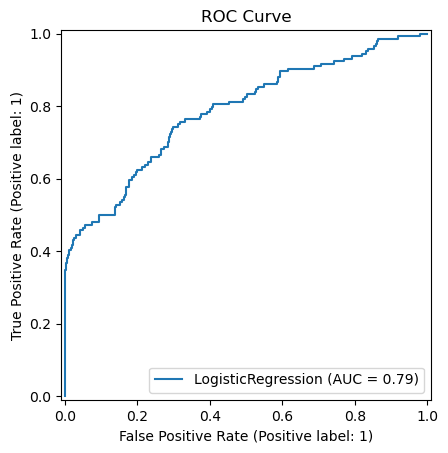

LogisticRegression(max_iter=5000, solver='saga')

In [37]:
# Base model with no balancing techniques
train_model(lr_model, X_train, X_test, y_train, y_test)


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       656
           1       0.39      0.81      0.53       144

    accuracy                           0.74       800
   macro avg       0.67      0.77      0.67       800
weighted avg       0.85      0.74      0.76       800


🧩 Confusion Matrix:
[[472 184]
 [ 27 117]]

🎯 AUC-ROC: 0.858


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


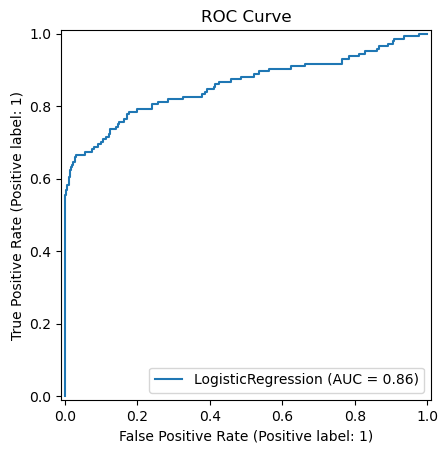

LogisticRegression(class_weight={0: 0.6097560975609756, 1: 2.7777777777777777},
                   max_iter=5000, solver='saga')

In [38]:
# With class weight
train_model(lr_model, X_train, X_test, y_train, y_test, use_class_weight = True)


📋 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.29      0.44       656
           1       0.22      0.94      0.36       144

    accuracy                           0.41       800
   macro avg       0.59      0.61      0.40       800
weighted avg       0.82      0.41      0.43       800


🧩 Confusion Matrix:
[[189 467]
 [  9 135]]

🎯 AUC-ROC: 0.889


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


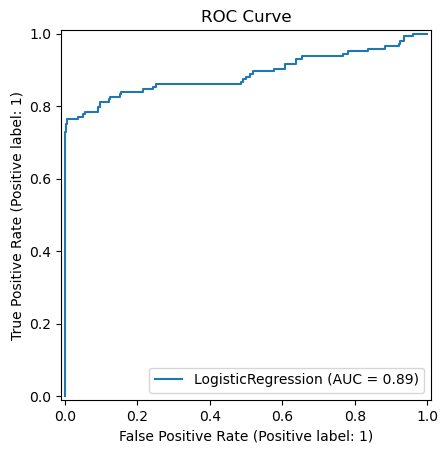

LogisticRegression(class_weight={0: 0.6097560975609756, 1: 2.7777777777777777},
                   max_iter=5000, solver='saga')

In [39]:
# With SMOTE
train_model(lr_model, X_train, X_test, y_train, y_test, use_smote = True)

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       656
           1       0.41      0.81      0.54       144

    accuracy                           0.75       800
   macro avg       0.68      0.78      0.69       800
weighted avg       0.85      0.75      0.78       800


🧩 Confusion Matrix:
[[485 171]
 [ 27 117]]

🎯 AUC-ROC: 0.859


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


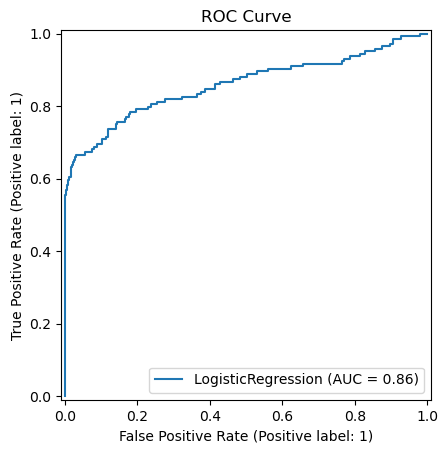

LogisticRegression(class_weight={0: 1.0, 1: 1.0}, max_iter=5000, solver='saga')

In [40]:
# With SMOTE and Class Weight
train_model(lr_model, X_train, X_test, y_train, y_test, use_smote = True , use_class_weight=True)

### **What can we learn from these results?**
- No balancing techniques:
    - The model has high precision and recall for class 0 (around 90%), meaning it is good at identifying non-Team Rocket members. 
    - Low precision and recall for class 1 (around 0.5), indicating that it may not be very effective at identifying Team Rocket members.
    - Confusion Matrix confirms the previous metrics
    - AUC-ROC score of 0.79 indicates that the model is performing better than random chance, but not outstandingly well. 

- With class_weight="balanced":
    - Model improved significantly on class 1 detection (recall from 0.5 to 0.82)
    - Low precision for class 1 (around 0.4), indicating there are still false positives.
    - Class 0 had a drop in recall (from 0.87 to 0.73) which is expected due to the balancing technique
    - Confusion Matrix shows the model identifies a lot more real Rocket members but with more false positives
    - AUC-ROC score increased to 0.86, a significant improvement

- With SMOTE:
    - Similar to class_weight, with recall reaching 0.81 and precision at 0.41
    - Class 0 also very similar, with recall of 0.74
    - AUC-ROC exactly the same

- With class_weight="balanced" & SMOTE:
    - Extremely similar results, probably because SMOTE is already balancing the classes well


## Random Forest

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       656
           1       1.00      0.97      0.99       144

    accuracy                           0.99       800
   macro avg       1.00      0.99      0.99       800
weighted avg       1.00      0.99      0.99       800


🧩 Confusion Matrix:
[[656   0]
 [  4 140]]

🎯 AUC-ROC: 0.991


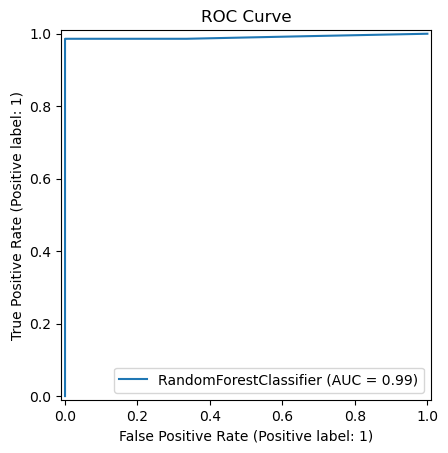

RandomForestClassifier(random_state=42)

In [41]:
# No balancing
train_model(rf_model, X_train, X_test, y_train, y_test)

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       656
           1       1.00      0.97      0.99       144

    accuracy                           0.99       800
   macro avg       1.00      0.99      0.99       800
weighted avg       1.00      0.99      0.99       800


🧩 Confusion Matrix:
[[656   0]
 [  4 140]]

🎯 AUC-ROC: 0.989


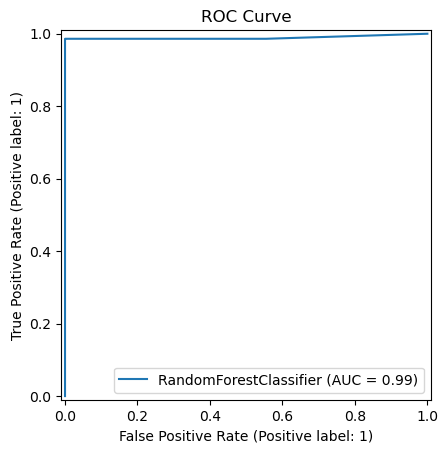

RandomForestClassifier(class_weight={0: 0.6097560975609756,
                                     1: 2.7777777777777777},
                       random_state=42)

In [42]:
# with class_weight
train_model(rf_model, X_train, X_test, y_train, y_test, use_class_weight=True)

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       656
           1       1.00      0.97      0.99       144

    accuracy                           0.99       800
   macro avg       1.00      0.99      0.99       800
weighted avg       1.00      0.99      0.99       800


🧩 Confusion Matrix:
[[656   0]
 [  4 140]]

🎯 AUC-ROC: 0.998


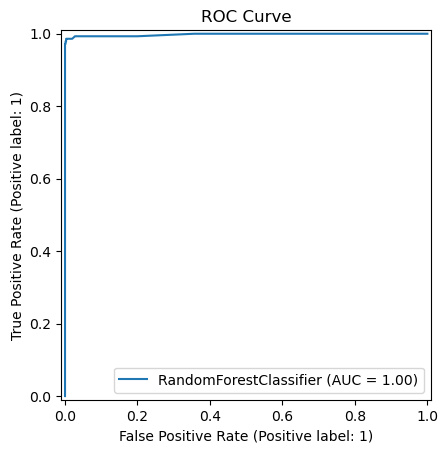

RandomForestClassifier(class_weight={0: 0.6097560975609756,
                                     1: 2.7777777777777777},
                       random_state=42)

In [43]:
# With SMOTE
train_model(rf_model, X_train, X_test, y_train, y_test, use_smote=True)

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       656
           1       1.00      0.97      0.99       144

    accuracy                           0.99       800
   macro avg       1.00      0.99      0.99       800
weighted avg       1.00      0.99      0.99       800


🧩 Confusion Matrix:
[[656   0]
 [  4 140]]

🎯 AUC-ROC: 0.998


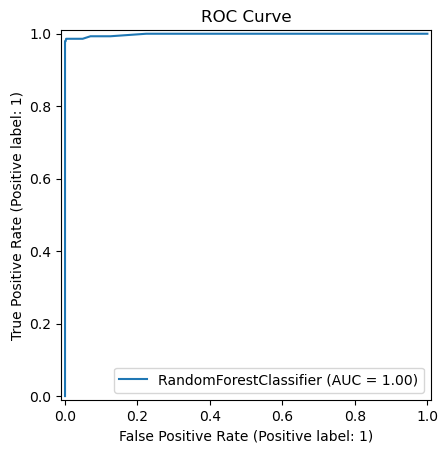

RandomForestClassifier(class_weight={0: 1.0, 1: 1.0}, random_state=42)

In [44]:
# With SMOTE and class_weight
train_model(rf_model, X_train, X_test, y_train, y_test, use_smote=True, use_class_weight=True)


### Key takeaways:
- Random Forest delivers **exceptional performance** even without balancing (**1.0** precision, **0.97** recall, **0.990** AUC-ROC)
- Class weighting and SMOTE do not significantly improve performance, the base model is already very strong.
- Random Forest is great at dealing with class inbalance


### Since Random Forest is performing the best, we will use it to predict the unlabeled data

In [ ]:
predict_unlabeled(rf_model, unlabeled_df, fitted_columns, output_path='../output')

✅ Predictions saved to 'predictions.csv'
